# STAT 207 Group Lab Assignment 3 - [10 total points]

## Manipulating and Combining Data to Answer Questions

<hr>

## <u>Purpose</u>:
You should work in groups of 2-3 on this report (not working in groups without permission will result in a point deduction). The purpose of this group lab assignment is to adjust data to be able to answer questions and provide insights from the data.
<hr>

## <u>Assignment Instructions</u>:

### Contribution Report
These contribution reports should be included in all group lab assignments. In this contribution report below you should list of the following:
1. The netID for the lab submission to be graded.  (Some groups have each member create their own version of the document, but only one needs to be submitted for grading.  Other groups have only one member compose and submit the lab.)
2. Names and netIDs of each team member.
3. Contributions of each team member to report.

### *andresg4 should be graded.  Grace Jiang (yj31) and Andres Gomez (andresg4) worked together on all parts of this lab assignment.

### Group Roles

Suggested and specified roles are provided below: 

#### Groups of 2

* **Driver**: This student will type the report.  While typing the report, you may be the one who is selecting the functions to apply to the data.
* **Navigator**: This student will guide the process of answering the question.  Specific ways to help may include: outlining the general steps needed to solve a question (providing the overview), locating examples within the course notes, and reviewing each line of code as it is typed.

#### Groups of 3

* **Driver**: This student will type the report.  They may also be the one to select the functions to apply to the data.
* **Navigator**: This student will guide the process of answering the question.  They may select the general approach to answering the question and/or a few steps to be completed along the way. 
* **Communicator**: This student will review the report (as it is typed) to ensure that it is clear and concise.  This student may also locate relevant examples within the course notes that may help complete the assignment.

<hr>

### Imports

In [40]:
#Run this
import pandas as pd                    # imports pandas and calls the imported version 'pd'
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns                  # imports the seaborn package with the imported name 'sns'
sns.set()  

## Steam Data

Steam is the world's most popular PC Gaming hub. They have a massive catalog of games, with everything from AAA blockbusters to small indie titles.  

You are a team of data scientists working for Steam, and you are responsible for completing analysis for a report that will go to the executives of Valve (the parent company for Steam).  

Unfortunately, the data were collected with a less than optimal structure.  The dataset is comprised of transactions within the Steam platform for a random sample of 500 steam users along with their purchase and game play behaviors.  It has the following columns:
* user_id,
* game_name,
* activity:
    - purchase: indicating that the user has *purchased* the corresponding game
    - play: indicating that the user has *played* the corresponding game (for at least some amount of time.) 
* hours_played_if_play:
    - if the row corresponds to a 'play' activity, this number represents the number of hours the user has played the game
    - if the row corresponds to a 'purchase' activity, this number is always a 1 (and means nothing... it's a placeholder).

Note that for each user-game combo, there will either be one row (if the game has only been purchased but not played) or two rows (if the game has been both purchased and played).

### 1. [0.5 point] Reading in the Data

Read in the steam_sample.csv file into a dataframe, being sure to read in missing data correctly.  Drop the observations with missing values.  *Hint:* you can return to Lab 2 Questions 1 & 2, where you performed these steps.

Also, separate the data into a purchase and a play data frame, for the purchase rows and the play rows, respectively (Question 4 of Lab 2).

In [41]:
df = pd.read_csv('steam_sample.csv', na_values = ['unknown'])
df = df.dropna()

In [42]:
df_purchase = df[ df.activity == 'purchase']
df_play = df[ df.activity == 'play']

### 2. [5.5 points] What is the Purchase to Play Conversion for Steam Games?

In Lab 2, we calculated the proportion of purchased games that were played.  In this question, we're going to explore this proportion for each game separately, to determine if we can identify games that are must-play games.

We will need to adjust the observational unit in our data to the game, calculate measures for each observational unit, and then combine different measures for each of those games.

**a)** First, create a data frame that calculates the number of users that purchased each game.  Make sure that you clean your data frame so that it is easy to use.

In [43]:
df_purchase_group = df_purchase[['game_name', 'user_id']]
df_purchase_group = df_purchase_group.groupby('game_name').agg('count').reset_index().rename( columns = {'user_id' : 'n_users_purchased'})
df_purchase_group

,game_name,n_users_purchased
0,1... 2... 3... KICK IT! (Drop That Beat Like a...,1
1,18 Wheels of Steel American Long Haul,1
2,1954 Alcatraz,1
3,3DMark,1
4,60 Seconds!,1
...,...,...
1440,oO,1
1441,resident evil 4 / biohazard 4,1
1442,sZone-Online,5
1443,the static speaks my name,1


**b)** From the data frame in **part a**, determine the number of distinct games that are included in the original data frame.  You will use this number later to check that all games are in your final data.

In [44]:
n_distinct_games = len(df[['game_name']].drop_duplicates())
n_distinct_games

1445

**c)** Then, create a data frame that calculates the number of users that played each game.  Again, make sure that you clean your data frame.

In [45]:
df_play_group = df_play[['game_name', 'user_id']]
df_play_group = df_play_group.groupby('game_name').agg('count').reset_index().rename( columns = {'user_id' : 'n_users_play'})
df_play_group

,game_name,n_users_play
0,1... 2... 3... KICK IT! (Drop That Beat Like a...,1
1,18 Wheels of Steel American Long Haul,1
2,3DMark,1
3,60 Seconds!,1
4,7 Days to Die,5
...,...,...
915,Zombies Monsters Robots,1
916,hocus,1
917,oO,1
918,sZone-Online,4


**d)** Now, merge your data frames from **parts a and c**, being sure that you retain any observation that appears in at least one of the two data frames.  *Hint*: Look up the pandas merge function, looking at the `how` parameter (input) in particular.  Try a few options for the `how` parameter.  Check the dimensions of the resulting data frame to see if you achieve the desired results.

In [46]:
df_merged = pd.merge(df_purchase_group, df_play_group, how = 'outer', on = 'game_name')
df_merged

,game_name,n_users_purchased,n_users_play
0,1... 2... 3... KICK IT! (Drop That Beat Like a...,1,1.0
1,18 Wheels of Steel American Long Haul,1,1.0
2,1954 Alcatraz,1,NaN
3,3DMark,1,1.0
4,60 Seconds!,1,1.0
...,...,...,...
1440,oO,1,1.0
1441,resident evil 4 / biohazard 4,1,NaN
1442,sZone-Online,5,4.0
1443,the static speaks my name,1,NaN


**e)** Calculate a new variable in the data for the number of users who have played that game divided by the number of users who have purchased the game (once for each distinct game).  If needed, look into and replace any missing values in the data with an appropriate alternative.  The `isna()` function can be helpful for this task, evaluating as True for missing values and False for observed values.

In [47]:
df_merged.isna().sum()

game_name              0
n_users_purchased      0
n_users_play         525
dtype: int64

In [48]:
df_merged['n_users_play'] = df_merged['n_users_play'].fillna(0)
df_merged.isna().sum()

game_name            0
n_users_purchased    0
n_users_play         0
dtype: int64

In [49]:
df_merged['percent_played'] = df_merged['n_users_play'] / df_merged['n_users_purchased']
df_merged

,game_name,n_users_purchased,n_users_play,percent_played
0,1... 2... 3... KICK IT! (Drop That Beat Like a...,1,1.0,1.000000
1,18 Wheels of Steel American Long Haul,1,1.0,1.000000
2,1954 Alcatraz,1,0.0,0.000000
3,3DMark,1,1.0,1.000000
4,60 Seconds!,1,1.0,1.000000
...,...,...,...,...
1440,oO,1,1.0,1.000000
1441,resident evil 4 / biohazard 4,1,0.0,0.000000
1442,sZone-Online,5,4.0,0.800000
1443,the static speaks my name,1,0.0,0.000000


**f)** What proportion of games in the data have a purchase to play conversion rate of 1 (that is every user who purchases the game also plays the game), or are must-play games?

In [50]:
df_must_play = df_merged[ df_merged.percent_played == 1]
len(df_must_play) / len(df_merged)

0.35986159169550175

### 3. [4 points] How Much Are Games Played?

In Question 2, we focused on whether a game was opened and played.  Now, we'd like to focus on how long each game is played.  In other words, we might be looking to approximate how captivating a game is after it is opened by recording how long a user plays the game.

**a)** Create a variable for the median time spent playing a game, with an observational unit of games.  Prepare and clean it appropriately.

In [51]:
df_median_time_play = df_play[['game_name', 'hours_played_if_play']].groupby('game_name').agg('median').reset_index().rename(columns = {'hours_played_if_play' : 'hours_played'})
df_median_time_play

,game_name,hours_played
0,1... 2... 3... KICK IT! (Drop That Beat Like a...,0.2
1,18 Wheels of Steel American Long Haul,5.8
2,3DMark,1.3
3,60 Seconds!,1.6
4,7 Days to Die,27.0
...,...,...
915,Zombies Monsters Robots,19.0
916,hocus,0.1
917,oO,0.2
918,sZone-Online,0.8


**b)** Visualize the values for this variable.  There may be multiple appropriate visualizations that you can complete.

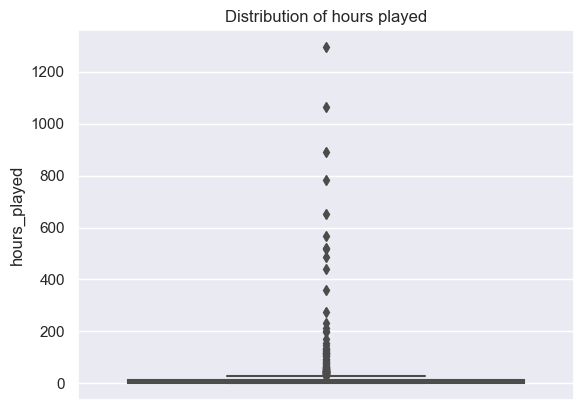

In [52]:
sns.boxplot(data = df_median_time_play, y = "hours_played")
plt.title("Distribution of hours played")
plt.show()

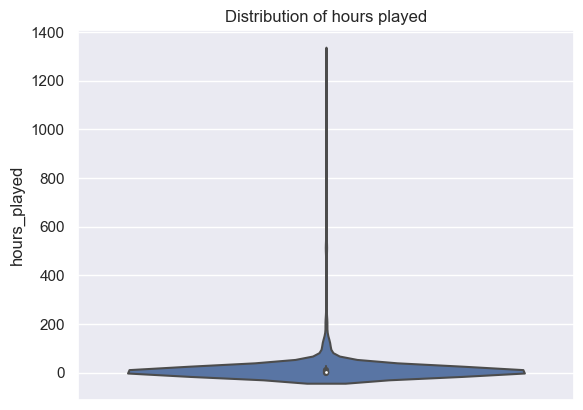

In [53]:
sns.violinplot(y = 'hours_played', data = df_median_time_play)
plt.title("Distribution of hours played")
plt.show()

**c)** Describe the distribution based on the visualization from part **b**.  You may also calculate numerical summaries below to help in your description, although these are not required.

In [54]:
print(f"Median is : {df_median_time_play['hours_played'].median()}")
print(f"Standard Deviation is: {df_median_time_play['hours_played'].std()}")

Median is : 3.7
Standard Deviation is: 83.70708258987351


The graph seems to be **skewed** towards 0 hours played and there are a **lot of outliers** with a few being extreme outliers. Trying to find the center and spread by just looking at the graph alone is difficult so I calculated the median and standard deviation which turned out to be **3.7 and 83.7 respectively**. I chose median and standard deviation instead of mean and variance because the latter turns out to be more sensitive to outliers which in this case there is a lot.

**d)** Do there appear to be any games that are especially captivating (games where users typically play the game for an especially long period of time) in the data?  Where would you suggest a cutoff to define games that are especially captivating?

In [55]:
df_median_time_play.nlargest(35, 'hours_played')

,game_name,hours_played
278,Eastside Hockey Manager,1295.00
688,Sid Meier's Civilization IV Beyond the Sword,1064.00
95,Blood Bowl Chaos Edition,891.00
334,Football Manager 2009,783.00
554,Out of the Park Baseball 16,652.00
340,Football Manager 2015,566.00
339,Football Manager 2014,522.00
553,Out of the Park Baseball 15,517.00
336,Football Manager 2011,488.00
755,Stronghold Kingdoms,441.00


#### I would say anything above or equal to 100 hours can be considered especially captivating.